# **SHETH L.U.J. & SIR M.V. COLLEGE**
**Shreeraj Desai | T075**
## **Practical No. 10**

**Aim** :- Data Visualization and Storytelling
*  Create meaningful visualizations using data visualization tools
*  Combine multiple visualizations to tell a compelling data story.
*  Present the findings and insights in a clear and concise manner.


# City Lifestyle Storytelling

We start by loading our dataset to uncover the stories hidden within the city metrics. We'll look at how income, rent, and happiness intertwine, and finally combine these insights into a holistic dashboard.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for cleaner look
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('Datasets/city_lifestyle_dataset.csv')
df.head()

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


## 1. The Cost of Living Narrative (Scatter Plot)

**The Story:** Does earning more money strictly mean paying more rent? By scattering cities based on their average income versus average rent, we can see if higher wages always demand higher living costs or if some cities offer a bargain.

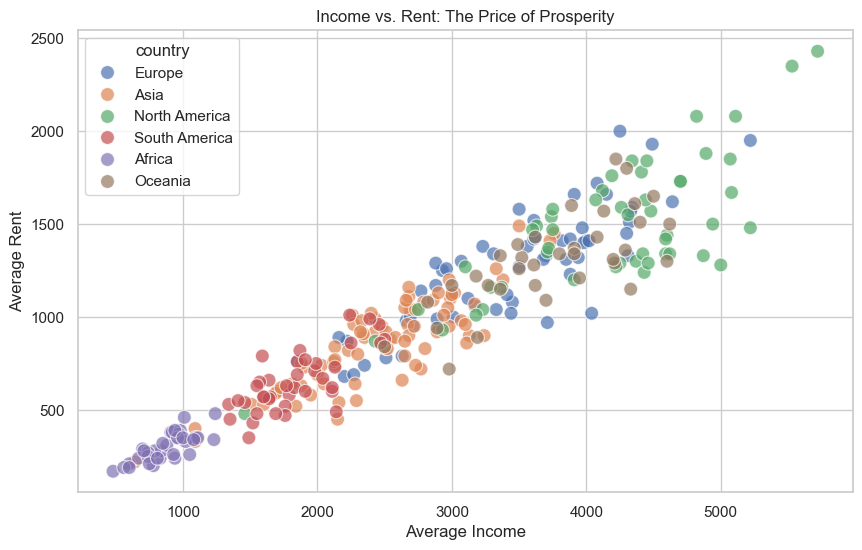

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_income', y='avg_rent', hue='country', s=100, alpha=0.7)

plt.title('Income vs. Rent: The Price of Prosperity')
plt.xlabel('Average Income')
plt.ylabel('Average Rent')
plt.show()

## 2. The Path to Happiness (Line Plot)

**The Story:** If we line up cities from the least dense to the most crowded, does happiness plummet? We sort the cities by Population Density and draw a line tracking the Happiness Score to see if crowds kill the vibe.

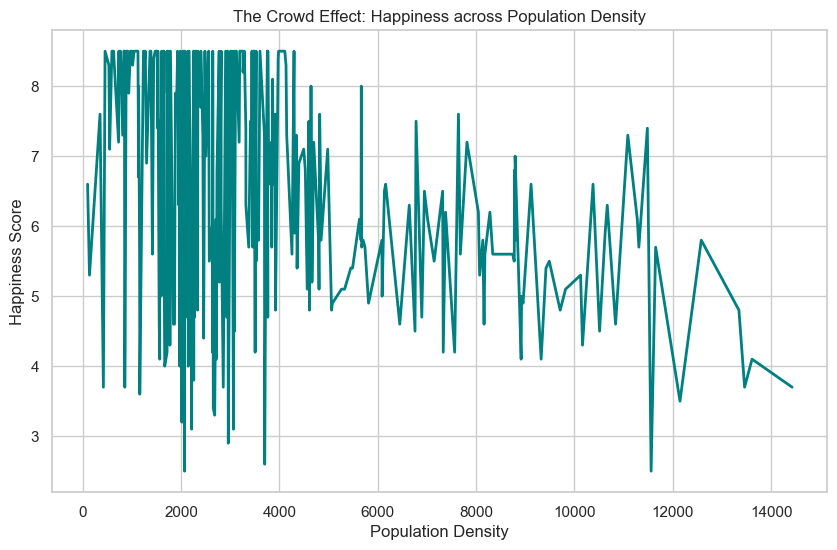

In [4]:
# Sorting data to create a coherent line
df_sorted = df.sort_values('population_density')

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['population_density'], df_sorted['happiness_score'], color='teal', linewidth=2)

plt.title('The Crowd Effect: Happiness across Population Density')
plt.xlabel('Population Density')
plt.ylabel('Happiness Score')
plt.show()

## 3. Regional Satisfaction (Bar Chart)

**The Story:** Which part of the world is actually the happiest? We group the cities by their Country/Region and stand them side-by-side to see who wins the happiness contest.

C:\Users\Shreeraj_N_Desai\AppData\Local\Temp\ipykernel_38144\998865849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_happiness, x='country', y='happiness_score', palette='viridis')


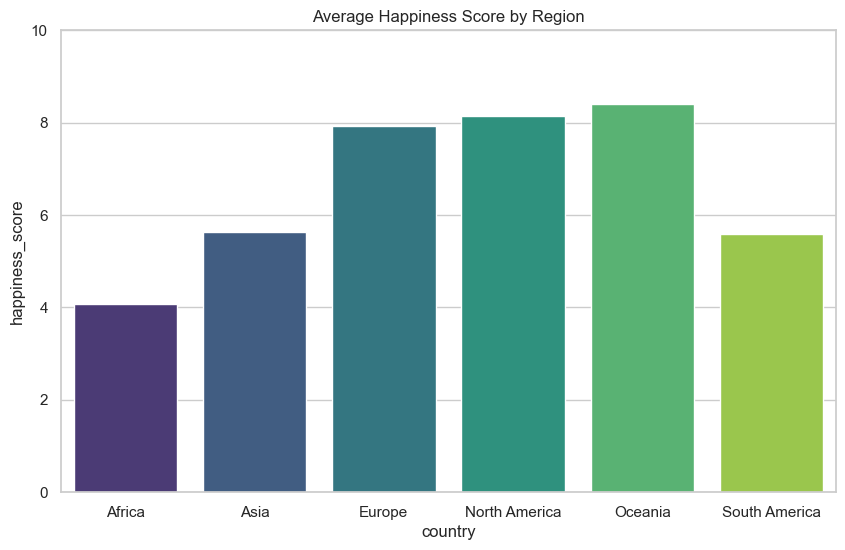

In [5]:
avg_happiness = df.groupby('country')['happiness_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_happiness, x='country', y='happiness_score', palette='viridis')

plt.title('Average Happiness Score by Region')
plt.ylim(0, 10)  # Happiness is usually out of 10
plt.show()

## 4. The Data Landscape (Pie Chart)

**The Story:** How is our dataset divided? A simple pie chart shows us the proportion of cities belonging to each region, giving us a sense of representation.

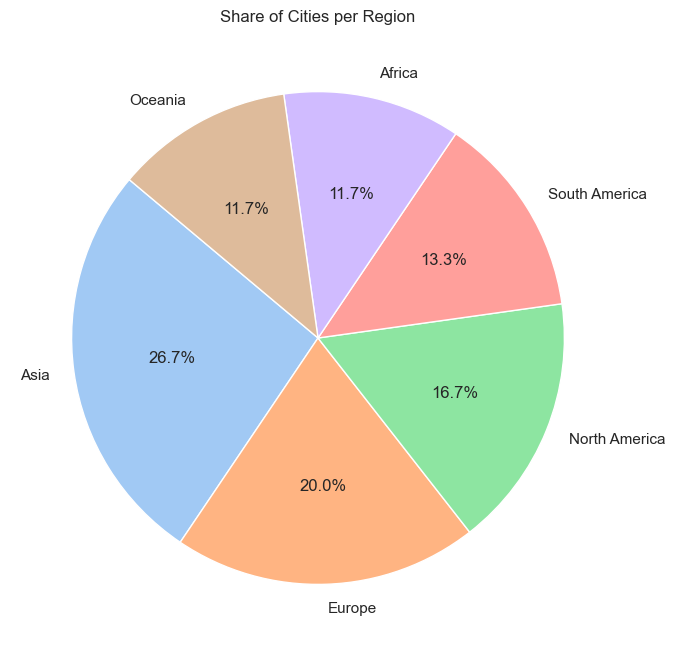

In [6]:
country_counts = df['country'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Share of Cities per Region')
plt.show()

## 5. Spotlighting the Leader (Exploded Pie Chart)

**The Story:** Sometimes one region dominates the conversation. We take the same pie but "explode" the largest slice to pull focus to the major player in our dataset.

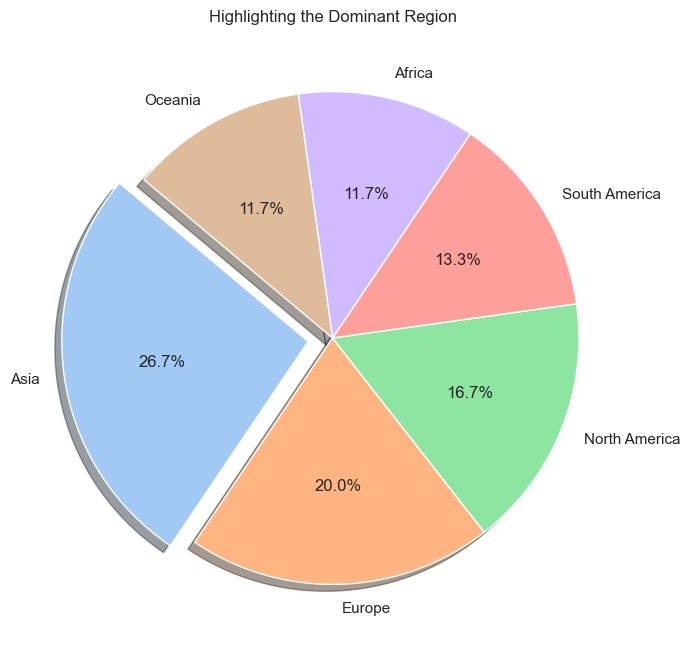

In [12]:
# Explode the first slice (largest)
explode = [0.1] + [0] * (len(country_counts) - 1)

plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True, colors=sns.color_palette('pastel'))

plt.title('Highlighting the Dominant Region')
plt.show()

## 6. The Wealth Spread (Distribution Plot)

**The Story:** Is everyone earning average money, or are there extreme outliers? This curve visualizes the spread of Average Income, showing us if the wealth is concentrated or spread thin.

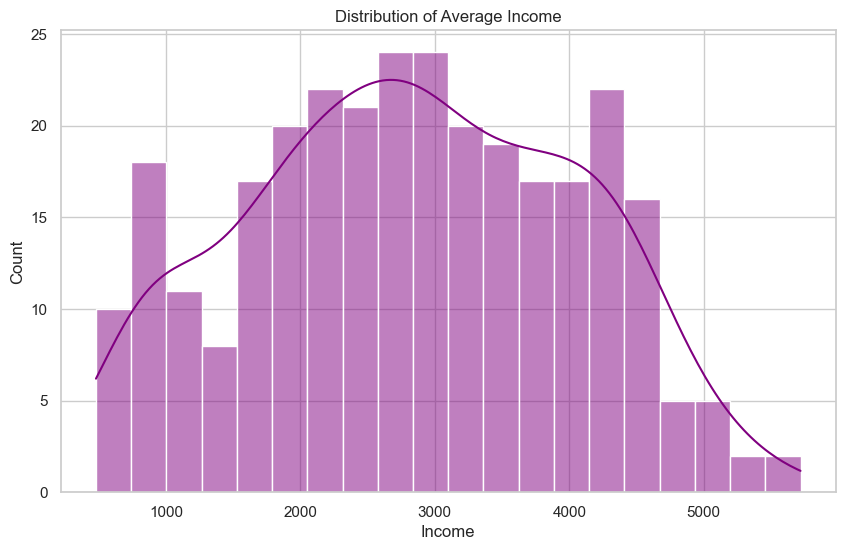

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_income'], kde=True, color='purple', bins=20)

plt.title('Distribution of Average Income')
plt.xlabel('Income')
plt.show()

## 7. The Rent Ranges (Box Plot)

**The Story:** Averages can lie. We use box plots to look at the *range* of rents in each region. The boxes show us where most people fall, and the whiskers reveal the extreme cheap or expensive outliers.

C:\Users\Shreeraj_N_Desai\AppData\Local\Temp\ipykernel_38144\942887671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='avg_rent', palette='coolwarm')


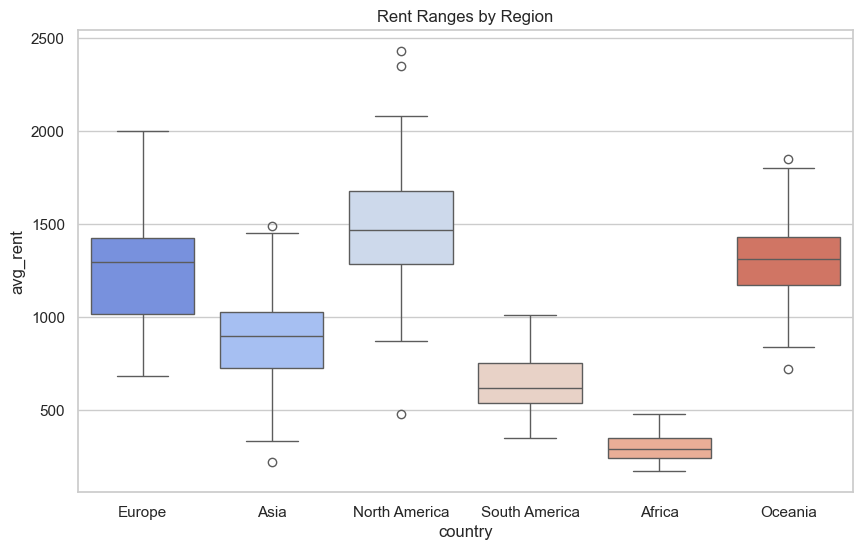

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='avg_rent', palette='coolwarm')

plt.title('Rent Ranges by Region')
plt.show()

## 8. The Big Picture (Combined Dashboard)

**The Story:** To see the full picture, we combine multiple factors into one view. We look at how Green Space affects Happiness, how Transport relates to Air Quality, and check Internet Access distribution. This dashboard weaves the final thread of our story: a holistic view of city living.

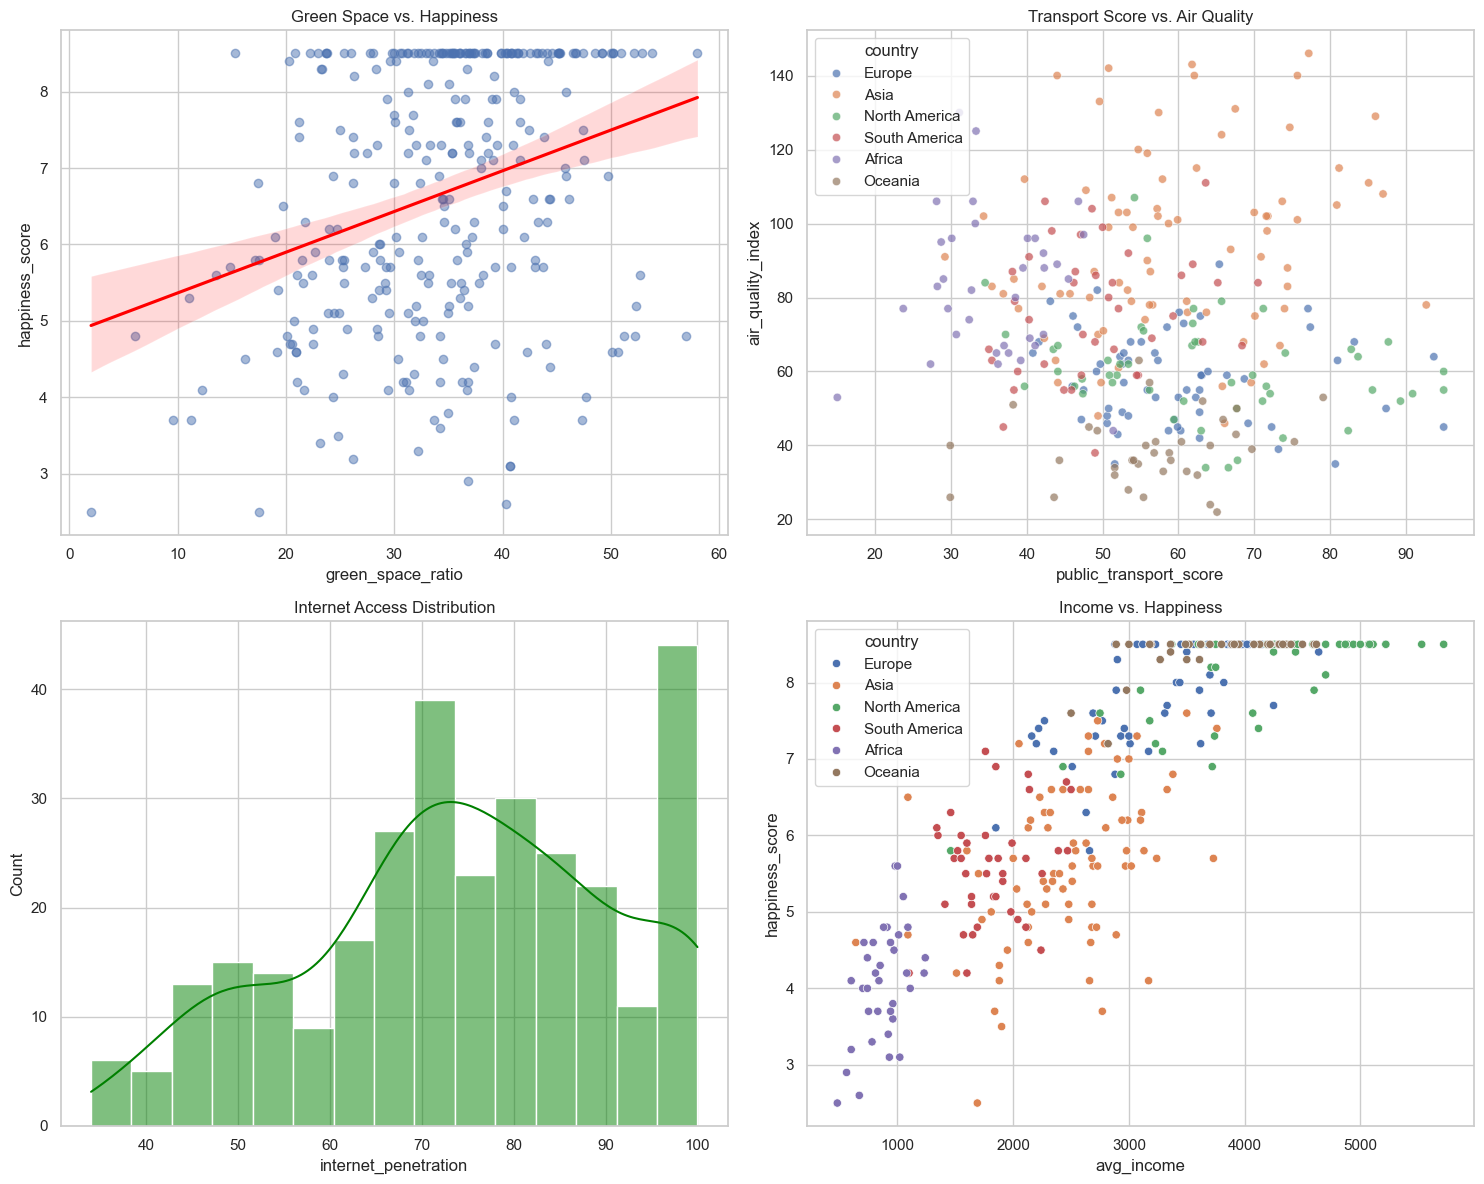

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Green Space vs Happiness
sns.regplot(ax=axes[0, 0], data=df, x='green_space_ratio', y='happiness_score', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0, 0].set_title('Green Space vs. Happiness')

# Plot 2: Transport vs Air Quality
sns.scatterplot(ax=axes[0, 1], data=df, x='public_transport_score', y='air_quality_index', hue='country', alpha=0.7)
axes[0, 1].set_title('Transport Score vs. Air Quality')

# Plot 3: Internet Penetration
sns.histplot(ax=axes[1, 0], data=df, x='internet_penetration', kde=True, color='green', bins=15)
axes[1, 0].set_title('Internet Access Distribution')

# Plot 4: Income vs Happiness
sns.scatterplot(ax=axes[1, 1], data=df, x='avg_income', y='happiness_score', hue='country')
axes[1, 1].set_title('Income vs. Happiness')

plt.tight_layout()
plt.show()

## Conclusion

**The Verdict:**
* **Prosperity comes at a price:** Higher incomes generally correlate with higher rents, as seen in the scatter plots.
* **Green is good:** The dashboard reveals a positive trend between green space ratio and happiness, suggesting nature is key to city satisfaction.
* **Infrastructure matters:** We see varied relationships between transport scores and air quality, highlighting the complexity of urban planning.
* **Regional differences:** While income varies significantly, happiness is often sustained by factors beyond just wealth, such as public services and environment.